# Project 2

TikTok User Engagement Exploratory Data Analysis

TikTok is a leading platform for short-form mobile videos. Given the high volume of user reports on videos, TikTok faces the challenge of efficiently reviewing them. To address this, TikTok aims to identify videos that make claims (as opposed to expressing opinions) as they are more likely to violate the platform's terms of service. The goal is to prioritize the review of such videos for potential policy violations.

## The Problem

Analyze a TikTok dataset to gain insights into video-related metrics such as view counts, likes, and transcription lengths. The aim is to explore the distribution of transcription lengths for different claim statuses (e.g., claims and opinions) and understand how video characteristics, like duration, correlate with view and like counts. Additionally, I investigate the mean view counts for claims and opinions, providing a comprehensive examination of the dataset for potential patterns and trends in TikTok content.

I first brought in the dataset as a dataframe and imported the libraries that I would be using for this project.

In [1]:
# Import packages for data manipulation
import pandas as pd
import numpy as np

# Import packages for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the TikTok dataset from a CSV file
data = pd.read_csv("tiktok_dataset.csv")

### Wrangling and Cleaning the Data

In [13]:
# Print the first few rows of the dataframe for a sanity check
print("Head of the DataFrame:")
print(data.head())

Head of the DataFrame:
   # claim_status    video_id  video_duration_sec  \
0  1        claim  7017666017                  59   
1  2        claim  4014381136                  32   
2  3        claim  9859838091                  31   
3  4        claim  1866847991                  25   
4  5        claim  7105231098                  19   

                            video_transcription_text verified_status  \
0  someone shared with me that drone deliveries a...    not verified   
1  someone shared with me that there are more mic...    not verified   
2  someone shared with me that american industria...    not verified   
3  someone shared with me that the metro of st. p...    not verified   
4  someone shared with me that the number of busi...    not verified   

  author_ban_status  video_view_count  video_like_count  video_share_count  \
0      under review          343296.0           19425.0              241.0   
1            active          140877.0           77355.0            19

In [14]:
# Print the last few rows of the dataframe for a sanity check
print("\nTail of the DataFrame:")
print(data.tail())


Tail of the DataFrame:
           # claim_status    video_id  video_duration_sec  \
19079  19080      opinion  1492320297                  49   
19080  19081      opinion  9841347807                  23   
19081  19082      opinion  8024379946                  50   
19082  19083      opinion  7425795014                   8   
19083  19084      opinion  4094655375                  58   

                                video_transcription_text verified_status  \
19079  in our opinion the earth holds about 11 quinti...    not verified   
19080  in our opinion the queens in ant colonies live...    not verified   
19081  in our opinion the moon is moving away from th...    not verified   
19082  in our opinion lightning strikes somewhere on ...    not verified   
19083  in our opinion a pineapple plant can only prod...    not verified   

      author_ban_status  video_view_count  video_like_count  \
19079            active            6067.0             423.0   
19080            active   

### There are 19,382 rows, 12 columns, and 4 datatypes for this dataset.

In [16]:
# Output the number of rows and columns in the dataset
print("\nDimensions (rows, columns):", data.shape)


Dimensions (rows, columns): (19084, 12)


In [17]:
# Output basic information about the dataset, including data types and non-null counts
print("\nDataset Information:")
print(data.info())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 19084 entries, 0 to 19083
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19084 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19084 non-null  int64  
 3   video_duration_sec        19084 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19084 non-null  object 
 6   author_ban_status         19084 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.9+ MB
None


### How many missing values are there? If there are, please remove them. Then compare statistical values before and after.

In [12]:
# Check for missing values
print("There are a total of", data.shape[0], "entries")
print(data.isna().sum())

There are a total of 19084 entries
#                           0
claim_status                0
video_id                    0
video_duration_sec          0
video_transcription_text    0
verified_status             0
author_ban_status           0
video_view_count            0
video_like_count            0
video_share_count           0
video_download_count        0
video_comment_count         0
dtype: int64


In [18]:
# Generate descriptive statistics about the numerical columns in the dataset
print("\nDescriptive Statistics:")
print(data.describe())


Descriptive Statistics:
                  #      video_id  video_duration_sec  video_view_count  \
count  19084.000000  1.908400e+04        19084.000000      19084.000000   
mean    9542.500000  5.624840e+09           32.423811     254708.558688   
std     5509.220604  2.537030e+09           16.226470     322893.280814   
min        1.000000  1.234959e+09            5.000000         20.000000   
25%     4771.750000  3.425100e+09           18.000000       4942.500000   
50%     9542.500000  5.609500e+09           32.000000       9954.500000   
75%    14313.250000  7.840823e+09           47.000000     504327.000000   
max    19084.000000  9.999873e+09           60.000000     999817.000000   

       video_like_count  video_share_count  video_download_count  \
count      19084.000000       19084.000000          19084.000000   
mean       84304.636030       16735.248323           1049.429627   
std       133420.546814       32036.174350           2004.299894   
min            0.000000    

In [19]:
# Drop rows with missing values
data_cleaned = data.dropna(axis=0)
print("There are now", data_cleaned.shape[0], "non-NA entries")

There are now 19084 non-NA entries


In [21]:
# Print the last few rows of the cleaned dataframe for verification
print("\nTail of the Cleaned DataFrame:")
print(data_cleaned.tail())


Tail of the Cleaned DataFrame:
           # claim_status    video_id  video_duration_sec  \
19079  19080      opinion  1492320297                  49   
19080  19081      opinion  9841347807                  23   
19081  19082      opinion  8024379946                  50   
19082  19083      opinion  7425795014                   8   
19083  19084      opinion  4094655375                  58   

                                video_transcription_text verified_status  \
19079  in our opinion the earth holds about 11 quinti...    not verified   
19080  in our opinion the queens in ant colonies live...    not verified   
19081  in our opinion the moon is moving away from th...    not verified   
19082  in our opinion lightning strikes somewhere on ...    not verified   
19083  in our opinion a pineapple plant can only prod...    not verified   

      author_ban_status  video_view_count  video_like_count  \
19079            active            6067.0             423.0   
19080            a

### How might these values influence the analysis?

Bias:
If the missing values are not missing completely at random, the removal of rows with missing values may introduce bias. If certain claim statuses or video characteristics are more prone to missing data, the analysis may be biased towards the characteristics with complete information.

Underestimation of Variability:
Removing rows with missing values might lead to an underestimation of variability in the dataset. Variability in certain features or claim statuses that have missing values could be crucial for understanding the diversity of TikTok content.

Impact on Group Comparisons:
The analysis of group comparisons, such as mean view counts for different claim statuses, could be influenced by the missing values. If the missingness is not uniform across claim statuses, the comparison results might not accurately reflect the true differences.

Misinterpretation of Trends:
The removal of missing values can affect the interpretation of trends, especially if there is a systematic pattern in the missingness related to specific video characteristics. This could potentially lead to inaccurate conclusions about relationships or patterns within the data.

### How does the code modify the TikTok dataset by introducing a new 'text_length' column, and what initial insights into transcription lengths are revealed by displaying the first few rows of the dataframe?

In [23]:
# Create a new column 'text_length' representing the length of 'video_transcription_text'
data_cleaned['text_length'] = data_cleaned['video_transcription_text'].str.len()
# Display the first few rows of the dataframe with the new 'text_length' column
print("\nDataFrame with text_length:")
print(data_cleaned.head())


DataFrame with Text Length:
   # claim_status    video_id  video_duration_sec  \
0  1        claim  7017666017                  59   
1  2        claim  4014381136                  32   
2  3        claim  9859838091                  31   
3  4        claim  1866847991                  25   
4  5        claim  7105231098                  19   

                            video_transcription_text verified_status  \
0  someone shared with me that drone deliveries a...    not verified   
1  someone shared with me that there are more mic...    not verified   
2  someone shared with me that american industria...    not verified   
3  someone shared with me that the metro of st. p...    not verified   
4  someone shared with me that the number of busi...    not verified   

  author_ban_status  video_view_count  video_like_count  video_share_count  \
0      under review          343296.0           19425.0              241.0   
1            active          140877.0           77355.0        

### What key insights can be derived from the computed means and filtered data, specifically focusing on the average video duration, text length, and view count in relation to the verification status and claim status on TikTok?

In [24]:
# Compute the mean 'video_duration_sec' for each group in 'verified_status'
mean_duration_by_verification = data_cleaned.groupby("verified_status")["video_duration_sec"].mean()
print("\nMean Video Duration by Verification Status:")
print(mean_duration_by_verification)


Mean Video Duration by Verification Status:
verified_status
not verified    32.467345
verified        31.775000
Name: video_duration_sec, dtype: float64


In [13]:
# Compute the mean count of characters in text_length for each claim_status
data[['claim_status', 'text_length']].groupby('claim_status').mean()

,text_length
claim_status,
claim,95.376978
opinion,82.722562


In [29]:
mean_duration = np.mean(video_duration_sec)
print(f"Mean Video Duration: {mean_duration} seconds")
mean_likes = np.mean(video_like_count)
print(f"Mean Like Count: {video_like_count}")
claims = data[data['claim_status'] == 'claim']
print('Mean view count claims:', claims['video_view_count'].mean())
claims = data[data['claim_status'] == 'opinion']
print('Mean view count claims:', claims['video_view_count'].mean())

Mean Video Duration: 36.25 seconds
Mean Like Count: [80000, 120000, 50000, 90000]
Mean view count claims: 501029.4527477102
Mean view count claims: 4956.43224989447


### Visual exploration of TikTok dataset by histograms, bar plots, and scatter plots, to reveal patterns in transcription lengths, video view counts, and relationships between video duration and engagement metrics

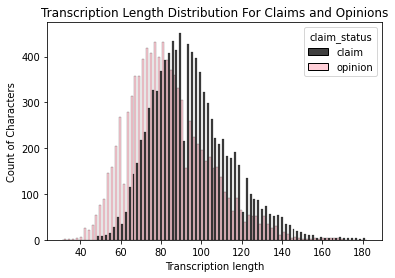

In [14]:
# Histogram plot distribution of Transcription length for claims and opinions
sns.histplot(data=data, stat="count", multiple="dodge", x= "text_length", kde=False, hue="claim_status", 
             palette=["black", "pink"], element="bars", legend=True)
plt.xlabel("Transcription length")
plt.ylabel("Count of Characters")
plt.title("Transcription Length Distribution For Claims and Opinions")
plt.show()

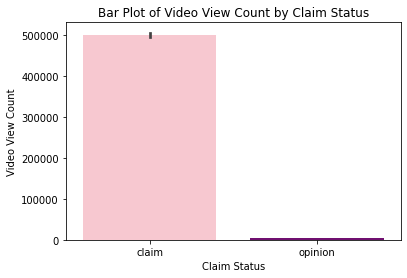

In [15]:
# Bar plot of video view count for each claim status
sns.barplot(x="claim_status", y="video_view_count", data=data, palette=["pink", "purple"])
plt.title('Bar Plot of Video View Count by Claim Status')
plt.xlabel('Claim Status')
plt.ylabel('Video View Count')
plt.show()

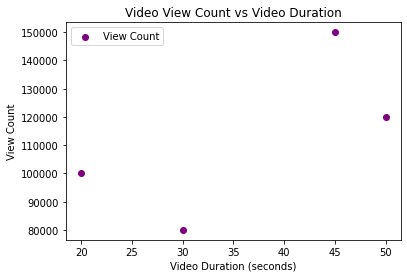

In [18]:
video_view_count = [100000, 150000, 80000, 120000]
video_duration_sec = [20, 45, 30, 50]
plt.scatter(video_duration_sec, video_view_count, color='purple', label='View Count')
plt.xlabel('Video Duration (seconds)')
plt.ylabel('View Count')
plt.title('Video View Count vs Video Duration')
plt.legend()
plt.show()

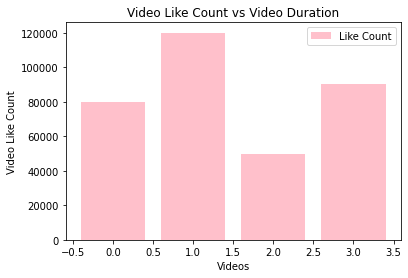

In [21]:
video_like_count = [80000, 120000, 50000, 90000]
video_duration_sec = [20, 45, 30, 50]
plt.bar(range(len(video_duration_sec)), video_like_count, label='Like Count', color='pink')
plt.xlabel('Videos')
plt.ylabel('Video Like Count')
plt.title('Video Like Count vs Video Duration')
plt.legend()

plt.show()

Text(0, 0.5, 'Average Video View Count')

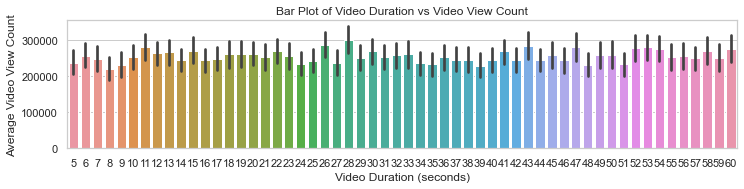

In [15]:
# Bar plot of average video_duration_sec for each variable
plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
sns.barplot(x="video_duration_sec", y="video_view_count", data=data)
plt.title('Bar Plot of Video Duration vs Video View Count')
plt.xlabel('Video Duration (seconds)')
plt.ylabel('Average Video View Count')

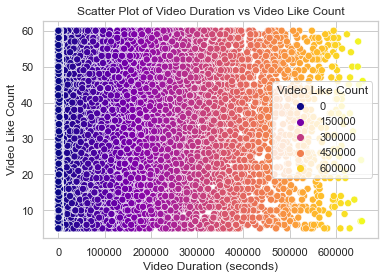

In [48]:
# Scatter plot for video_duration_sec against video_like_count
sns.scatterplot(data=data, x="video_like_count", y="video_duration_sec", hue="video_like_count", 
                palette="plasma", s=50)
plt.xlabel("Video Duration (seconds)")
plt.ylabel("Video Like Count")

plt.title("Scatter Plot of Video Duration vs Video Like Count")
plt.legend(title="Video Like Count")
plt.show()
